# Feature Extraction

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("datasets/telco-nonoutliers.csv")

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

## Feature Extraction

In [7]:
df['MonthlyChargesTenureRatio'] = df['MonthlyCharges'] / df['tenure']

This feature could help capture the value that a customer gets from their monthly payment. It could be created by dividing the 'MonthlyCharges' column by the 'tenure' column.

In [8]:
df['TotalChargesMonthlyChargesRatio'] = df['TotalCharges'] / df['MonthlyCharges']

This feature could help capture the long-term value that a customer provides. It could be created by dividing the 'TotalCharges' column by the 'MonthlyCharges' column.

In [9]:
service_columns = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                   'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
df['NumServicesUsed'] = df[service_columns].apply(lambda x: x.str.contains('Yes').sum(), axis=1)

This feature could help capture the engagement level of the customer. It could be created by counting the number of columns that have a value of 'Yes'.

In [10]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MonthlyChargesTenureRatio,TotalChargesMonthlyChargesRatio,NumServicesUsed
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,29.850,1.000000,1
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,1.675,33.178227,3
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,26.925,2.008357,3
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,0.940,43.516548,3
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,35.350,2.144979,1


## Label Encoding or One Hot Encoding

In [11]:
service_columns

['PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies']

In [12]:
service_columns = [col for col in service_columns if col != 'InternetService']

In [13]:
df.drop(service_columns, inplace=True, axis=1)

In [14]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,InternetService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MonthlyChargesTenureRatio,TotalChargesMonthlyChargesRatio,NumServicesUsed
0,7590-VHVEG,Female,0,Yes,No,1,DSL,Month-to-month,Yes,Electronic check,29.85,29.85,No,29.850,1.000000,1
1,5575-GNVDE,Male,0,No,No,34,DSL,One year,No,Mailed check,56.95,1889.50,No,1.675,33.178227,3
2,3668-QPYBK,Male,0,No,No,2,DSL,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,26.925,2.008357,3
3,7795-CFOCW,Male,0,No,No,45,DSL,One year,No,Bank transfer (automatic),42.30,1840.75,No,0.940,43.516548,3
4,9237-HQITU,Female,0,No,No,2,Fiber optic,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,35.350,2.144979,1


In [15]:
df[['Partner', 'Dependents', 'PaperlessBilling', 'Churn']] = df[['Partner', 'Dependents', 'PaperlessBilling', 'Churn']].applymap(lambda x: 1 if x == 'Yes' else 0)

In [16]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,InternetService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MonthlyChargesTenureRatio,TotalChargesMonthlyChargesRatio,NumServicesUsed
0,7590-VHVEG,Female,0,1,0,1,DSL,Month-to-month,1,Electronic check,29.85,29.85,0,29.850,1.000000,1
1,5575-GNVDE,Male,0,0,0,34,DSL,One year,0,Mailed check,56.95,1889.50,0,1.675,33.178227,3
2,3668-QPYBK,Male,0,0,0,2,DSL,Month-to-month,1,Mailed check,53.85,108.15,1,26.925,2.008357,3
3,7795-CFOCW,Male,0,0,0,45,DSL,One year,0,Bank transfer (automatic),42.30,1840.75,0,0.940,43.516548,3
4,9237-HQITU,Female,0,0,0,2,Fiber optic,Month-to-month,1,Electronic check,70.70,151.65,1,35.350,2.144979,1


In [17]:
df['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [18]:
df['Contract'] = df['Contract'].apply(lambda x: 0 if x == 'Month-to-month' else (
    1 if x == 'One year' else 2
))

In [19]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,InternetService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MonthlyChargesTenureRatio,TotalChargesMonthlyChargesRatio,NumServicesUsed
0,7590-VHVEG,Female,0,1,0,1,DSL,0,1,Electronic check,29.85,29.85,0,29.850,1.000000,1
1,5575-GNVDE,Male,0,0,0,34,DSL,1,0,Mailed check,56.95,1889.50,0,1.675,33.178227,3
2,3668-QPYBK,Male,0,0,0,2,DSL,0,1,Mailed check,53.85,108.15,1,26.925,2.008357,3
3,7795-CFOCW,Male,0,0,0,45,DSL,1,0,Bank transfer (automatic),42.30,1840.75,0,0.940,43.516548,3
4,9237-HQITU,Female,0,0,0,2,Fiber optic,0,1,Electronic check,70.70,151.65,1,35.350,2.144979,1


In [20]:
df = pd.get_dummies(df, columns=['InternetService', 'PaymentMethod'], drop_first=True)

In [21]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MonthlyChargesTenureRatio,TotalChargesMonthlyChargesRatio,NumServicesUsed,InternetService_Fiber optic,InternetService_No,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,Female,0,1,0,1,0,1,29.85,29.85,0,29.850,1.000000,1,0,0,0,1,0
1,5575-GNVDE,Male,0,0,0,34,1,0,56.95,1889.50,0,1.675,33.178227,3,0,0,0,0,1
2,3668-QPYBK,Male,0,0,0,2,0,1,53.85,108.15,1,26.925,2.008357,3,0,0,0,0,1
3,7795-CFOCW,Male,0,0,0,45,1,0,42.30,1840.75,0,0.940,43.516548,3,0,0,0,0,0
4,9237-HQITU,Female,0,0,0,2,0,1,70.70,151.65,1,35.350,2.144979,1,1,0,0,1,0


## General Analyze

In [22]:
from feature_utils import get_correlation

2023-03-28 02:13:52,668 - logging_utils - DEBUG - get_correlation executing...
2023-03-28 02:13:52,697 - logging_utils - INFO - 
                                       SeniorCitizen  ...  PaymentMethod_Mailed check
SeniorCitizen                               1.000000  ...                   -0.152987
Partner                                     0.016957  ...                   -0.096948
Dependents                                 -0.210550  ...                    0.056448
tenure                                      0.015683  ...                   -0.232181
Contract                                   -0.141820  ...                   -0.007512
PaperlessBilling                            0.156258  ...                   -0.203981
MonthlyCharges                              0.219874  ...                   -0.376568
TotalCharges                                0.102411  ...                   -0.294708
Churn                                       0.150541  ...                   -0.090773
MonthlyChar

C:\Users\talha\OneDrive\Masaüstü\Talha Nebi Kumru\Data Science\Miuul\Feature Engineering\Telco_Customer_Churn\feature_utils.py:187: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


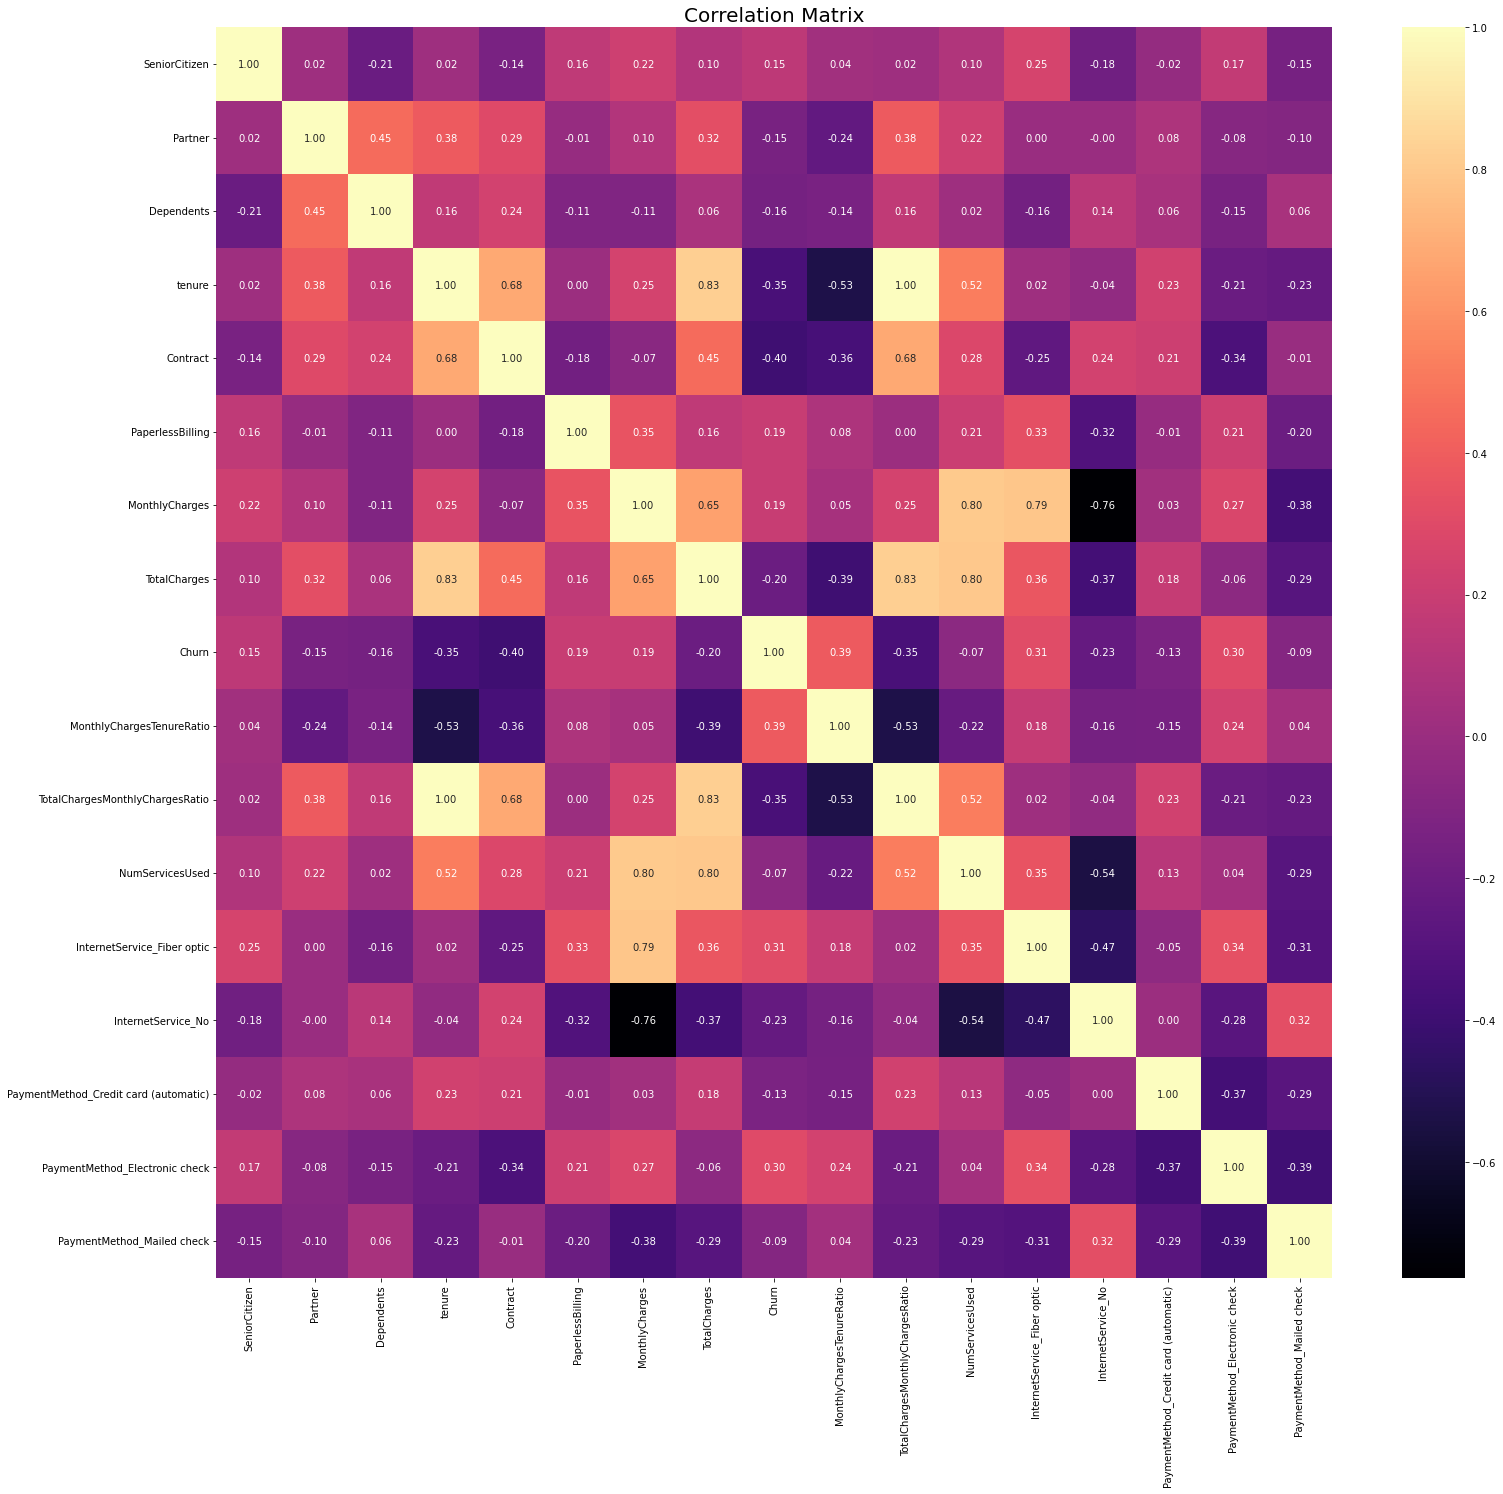

In [23]:
get_correlation(df, 1)

In [24]:
df.to_csv('datasets/Telco_feature.csv', index=False)